In [1]:
from scipy.io import arff
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer

# DATA PREPROCESSING

In [2]:
df=pd.read_csv('ckd.csv',na_values='?')
df_objs=pd.read_csv('ckd.csv',na_values='?')
df_objs = df.select_dtypes(include='object')
df.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_gluc_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packet_cell_volume',
       'white_blood_cell_compt', 'red_blood_cell_compt', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [3]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

<AxesSubplot:xlabel='specific_gravity', ylabel='count'>

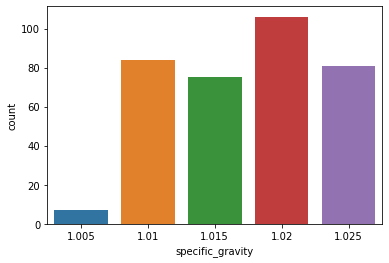

In [4]:
sns.countplot(x=df['specific_gravity'])

In [5]:
from sklearn import preprocessing


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_gluc_random        356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [7]:
df=df.drop('id',axis=1)

In [8]:
le = preprocessing.LabelEncoder()


In [9]:
df_objs = df.select_dtypes(include='object')
df_nums=df.select_dtypes(exclude='object')


In [10]:
original = df_objs
mask = df_objs.isnull()

df_objs = df_objs.apply(le.fit_transform)
df_objs.where(~mask, original)


,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,NaN,1,0,0,1,1,0,0,0,0,0
1,NaN,1,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,1,0,1,0
3,1,0,1,0,1,0,0,1,1,1,0
4,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,0,0,0,0,0,0,0,1
396,1,1,0,0,0,0,0,0,0,0,1
397,1,1,0,0,0,0,0,0,0,0,1
398,1,1,0,0,0,0,0,0,0,0,1


In [11]:
df = pd.concat([df_nums,df_objs],axis=1)

In [12]:
from sklearn.impute import KNNImputer

In [13]:
imputer = KNNImputer()
x=imputer.fit_transform(df)

In [15]:
data = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [16]:
df=data
df

,age,blood_pressure,specific_gravity,albumin,sugar,blood_gluc_random,blood_urea,serum_creatinine,sodium,potassium,...,pus_cell,pus_cell_clumps,bacteria,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,137.6,4.20,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,113.0,18.0,0.8,136.8,3.92,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,133.8,4.20,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.50,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.4,3.98,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.0,49.0,0.5,150.0,4.90,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
396,42.0,70.0,1.025,0.0,0.0,75.0,31.0,1.2,141.0,3.50,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
397,12.0,80.0,1.020,0.0,0.0,100.0,26.0,0.6,137.0,4.40,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
398,17.0,60.0,1.025,0.0,0.0,114.0,50.0,1.0,135.0,4.90,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:xlabel='sodium', ylabel='count'>

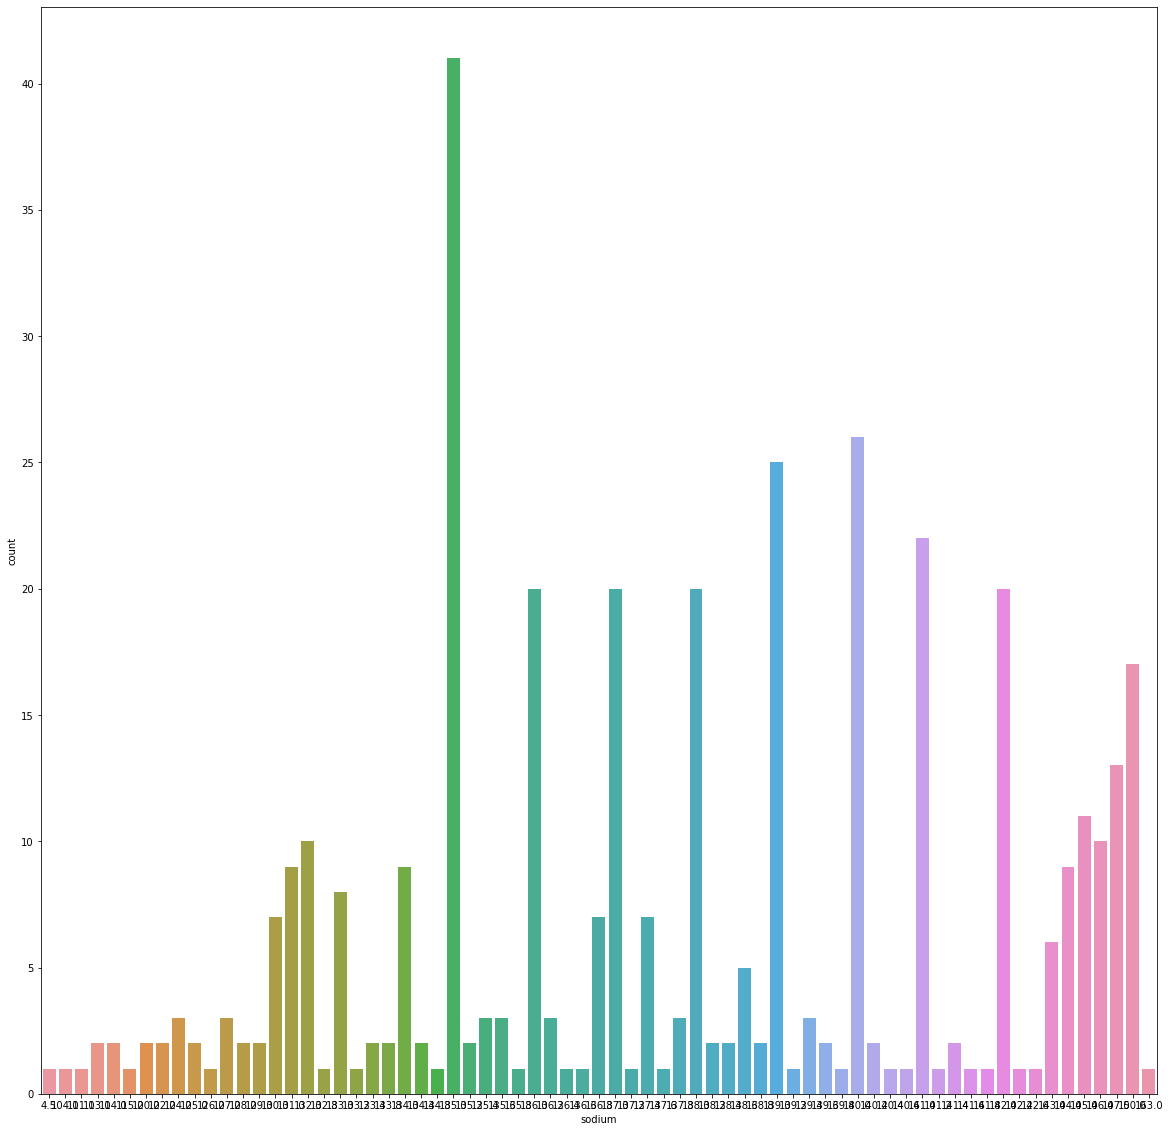

In [18]:
plt.figure(figsize=(20,20))

sns.countplot(data=df,x='sodium')

# Basic Classifiers

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer



### KNN

In [20]:
X = df.drop('class',axis=1)
y = df['class']
scaler = StandardScaler()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
knn = KNeighborsClassifier()
operations = [('scaler',scaler),('knn',knn)]

In [23]:
k_values = list(range(1,20))
pipe = Pipeline(operations)
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [24]:
param_grid = {'knn__n_neighbors': k_values}

In [25]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [26]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=2))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=2),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 2,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [27]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(scaled_X_train,y_train) 

KNeighborsClassifier(n_neighbors=2)

In [28]:
y_pred = knn_model.predict(scaled_X_test)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        76
         1.0       0.95      0.91      0.93        44

    accuracy                           0.95       120
   macro avg       0.95      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120



In [30]:
accuracy_score(y_test,y_pred)

0.95

In [31]:
from sklearn.metrics import mean_squared_error
import math



### SVM

In [32]:
svc = SVC(class_weight='balanced',kernel='rbf')

In [33]:
param_grid = {'C':[0.001,0.01,0.1,0.5,0.75,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [34]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [35]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 0.75, 1],
                         'gamma': ['scale', 'auto']})

In [36]:
grid.best_params_

{'C': 0.5, 'gamma': 'scale'}

In [37]:
grid_pred = grid.predict(scaled_X_test)

In [38]:
confusion_matrix(y_test,grid_pred)

array([[75,  1],
       [ 4, 40]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pred)

0.95

In [40]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        76
         1.0       0.98      0.91      0.94        44

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.95       120
weighted avg       0.96      0.96      0.96       120



### Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print( format(accuracy_score(y_test, y_pred)))





0.925


### Logistic Regression 

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log_model = LogisticRegression()

In [44]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [45]:
log_model.coef_

array([[ 0.2216581 , -0.63157374,  1.85201754, -1.18022231, -0.3347169 ,
        -0.94473199,  0.08055026, -0.6696392 ,  0.70362477,  0.12047016,
         1.37334991,  0.77715634, -0.2505075 ,  0.74514606, -0.90731164,
         0.29814741, -0.0551571 ,  0.0254625 , -0.6991209 , -0.70034515,
         0.35543974, -1.07877937, -0.92911337, -0.02102484]])

In [46]:
y_pred = log_model.predict(scaled_X_test)

In [47]:
confusion_matrix(y_test,y_pred)

array([[75,  1],
       [ 3, 41]], dtype=int64)

In [48]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [49]:
coefs = coefs.sort_values()

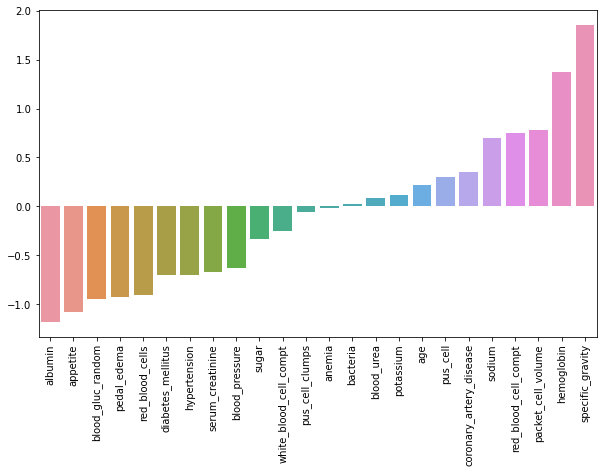

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);
plt.xticks(rotation=90);

In [51]:
accuracy_score(y_test,y_pred)

0.9666666666666667

# CFS + CLASSIFERS

In [52]:
import numpy as np
from skfeature.utility.mutual_information import su_calculation


def merit_calculation(X, y):
    """
    This function calculates the merit of X given class labels y, where
    merits = (k * rcf)/sqrt(k+k*(k-1)*rff)
    rcf = (1/k)*sum(su(fi,y)) for all fi in X
    rff = (1/(k*(k-1)))*sum(su(fi,fj)) for all fi and fj in X
    Input
    ----------
    X: {numpy array}, shape (n_samples, n_features)
        input data
    y: {numpy array}, shape (n_samples,)
        input class labels
    Output
    ----------
    merits: {float}
        merit of a feature subset X
    """

    n_samples, n_features = X.shape
    rff = 0
    rcf = 0
    for i in range(n_features):
        fi = X[:, i]
        rcf += su_calculation(fi, y)
        for j in range(n_features):
            if j > i:
                fj = X[:, j]
                rff += su_calculation(fi, fj)
    rff *= 2
    merits = rcf / np.sqrt(n_features + rff)
    return merits


def cfs(X, y):
    """
    This function uses a correlation based heuristic to evaluate the worth of features which is called CFS
    Input
    -----
    X: {numpy array}, shape (n_samples, n_features)
        input data
    y: {numpy array}, shape (n_samples,)
        input class labels
    Output
    ------
    F: {numpy array}
        index of selected features
    Reference
    ---------
    Zhao, Zheng et al. "Advancing Feature Selection Research - ASU Feature Selection Repository" 2010.
    """

    n_samples, n_features = X.shape
    F = []
    # M stores the merit values
    M = []
    while True:
        merit = -100000000000
        idx = -1
        for i in range(n_features):
            if i not in F:
                F.append(i)
                # calculate the merit of current selected features
                t = merit_calculation(X.iloc[:, F].values, y)
                if t > merit:
                    merit = t
                    idx = i
                F.pop()
        F.append(idx)
        M.append(merit)
        
        if len(M) ==17:
          
                            break
    return np.array(F)

In [53]:
y=df['class']
X=df.drop('class',axis=1)
k=cfs(X,y)


In [54]:
col_corr = set() 
for i in k:
    colname = df.columns[i]
    col_corr.add(colname)
col_corr    

{'albumin',
 'anemia',
 'appetite',
 'bacteria',
 'blood_pressure',
 'coronary_artery_disease',
 'diabetes_mellitus',
 'hypertension',
 'packet_cell_volume',
 'pedal_edema',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cells',
 'serum_creatinine',
 'sodium',
 'specific_gravity',
 'sugar'}

In [55]:
col_corr = set() 
for i in cfs(X,y):
    colname = df.columns[i]
    col_corr.add(colname)
col_corr

{'albumin',
 'anemia',
 'appetite',
 'bacteria',
 'blood_pressure',
 'coronary_artery_disease',
 'diabetes_mellitus',
 'hypertension',
 'packet_cell_volume',
 'pedal_edema',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cells',
 'serum_creatinine',
 'sodium',
 'specific_gravity',
 'sugar'}

In [56]:
df=df[col_corr]
#on supprime les features non significatifs

In [57]:
X = df

scaler = StandardScaler()
X

,appetite,pus_cell,pedal_edema,packet_cell_volume,diabetes_mellitus,red_blood_cells,coronary_artery_disease,sugar,albumin,serum_creatinine,hypertension,anemia,pus_cell_clumps,blood_pressure,bacteria,sodium,specific_gravity
0,0.0,1.0,0.0,44.0,1.0,2.0,0.0,0.0,1.0,1.2,1.0,0.0,0.0,80.0,0.0,137.6,1.020
1,0.0,1.0,0.0,38.0,0.0,2.0,0.0,0.0,4.0,0.8,0.0,0.0,0.0,50.0,0.0,136.8,1.020
2,1.0,1.0,0.0,31.0,1.0,1.0,0.0,3.0,2.0,1.8,0.0,1.0,0.0,80.0,0.0,133.8,1.010
3,1.0,0.0,1.0,32.0,0.0,1.0,0.0,0.0,4.0,3.8,1.0,1.0,1.0,70.0,0.0,111.0,1.005
4,0.0,1.0,0.0,35.0,0.0,1.0,0.0,0.0,2.0,1.4,0.0,0.0,0.0,80.0,0.0,138.4,1.010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,1.0,0.0,47.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,80.0,0.0,150.0,1.020
396,0.0,1.0,0.0,54.0,0.0,1.0,0.0,0.0,0.0,1.2,0.0,0.0,0.0,70.0,0.0,141.0,1.025
397,0.0,1.0,0.0,49.0,0.0,1.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,80.0,0.0,137.0,1.020
398,0.0,1.0,0.0,51.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60.0,0.0,135.0,1.025


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train
#okok

,appetite,pus_cell,pedal_edema,packet_cell_volume,diabetes_mellitus,red_blood_cells,coronary_artery_disease,sugar,albumin,serum_creatinine,hypertension,anemia,pus_cell_clumps,blood_pressure,bacteria,sodium,specific_gravity
157,0.0,0.0,0.0,39.0,1.0,1.0,0.0,0.0,3.0,1.7,1.0,0.0,0.0,70.0,0.0,136.0,1.025
109,0.0,2.0,0.0,42.8,1.0,2.0,0.0,0.4,0.6,1.9,0.0,0.0,0.0,70.0,0.0,136.8,1.018
17,1.0,2.0,0.0,35.6,0.0,2.0,0.0,0.4,1.2,5.2,1.0,0.0,0.0,80.0,0.0,139.0,1.015
347,0.0,1.0,0.0,43.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,60.0,0.0,144.0,1.025
24,1.0,0.0,0.0,39.0,0.0,1.0,0.0,0.0,4.0,1.4,1.0,0.0,0.0,100.0,1.0,129.0,1.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.0,1.0,0.0,28.0,1.0,1.0,0.0,0.0,1.0,3.3,1.0,0.0,0.0,60.0,0.0,141.0,1.010
106,0.0,2.0,1.0,17.0,1.0,2.0,0.0,0.4,1.6,6.1,1.0,1.0,0.0,90.0,0.0,127.0,1.014
270,0.0,1.0,0.0,41.0,0.0,1.0,0.0,0.0,0.0,1.1,0.0,0.0,0.0,80.0,0.0,145.0,1.025
348,0.0,1.0,0.0,44.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,80.0,0.0,147.0,1.020


In [59]:
knn = KNeighborsClassifier()
operations = [('scaler',scaler),('knn',knn)]

In [60]:
k_values = list(range(1,20))
pipe = Pipeline(operations)
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [61]:
param_grid = {'knn__n_neighbors': k_values}

In [62]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

full_cv_classifier.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [63]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=2))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=2),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 2,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [64]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.96785714, 0.975     , 0.96071429, 0.97142857, 0.96428571,
       0.95      , 0.94285714, 0.94642857, 0.93928571, 0.94642857,
       0.93571429, 0.93571429, 0.925     , 0.925     , 0.92142857,
       0.92857143, 0.92857143, 0.93214286, 0.91428571])

In [65]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(scaled_X_train,y_train) 

KNeighborsClassifier(n_neighbors=2)

In [66]:
y_pred = knn_model.predict(scaled_X_test)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96        76
         1.0       0.97      0.89      0.93        44

    accuracy                           0.95       120
   macro avg       0.96      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120



In [68]:
accuracy_score(y_test,y_pred)

0.95

In [69]:
MSE = mean_squared_error(y_test,y_pred)
RMSE = math.sqrt(MSE)
RMSE

0.22360679774997896

###### La methode cfs n'a pas d'effet


# SVM + CFS

In [70]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [71]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [72]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [73]:
grid.best_params_

{'C': 0.5, 'gamma': 'scale'}

In [74]:
grid_pred = grid.predict(scaled_X_test)

In [75]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        76
         1.0       0.95      0.91      0.93        44

    accuracy                           0.95       120
   macro avg       0.95      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120



In [76]:
accuracy_score(y_test,y_pred)

0.95

## Naive Bayes +CFS

In [77]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print( format(accuracy_score(y_test, y_pred)))


0.9083333333333333


###### La methode cfs n'a pas d'effet


## Logistic regression +CFS

In [78]:
log_model = LogisticRegression()

In [79]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [80]:
log_model.coef_

array([[-1.41201571,  0.37142842, -0.86768352,  1.57656031, -0.93939514,
        -0.86578948,  0.4908514 , -0.35918873, -1.3593409 , -0.66521673,
        -0.67301227, -0.09725574, -0.09875546, -0.59584181,  0.06734238,
         0.83102558,  1.91623925]])

In [81]:
y_pred = log_model.predict(scaled_X_test)

In [82]:
confusion_matrix(y_test,y_pred)

array([[74,  2],
       [ 2, 42]], dtype=int64)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        76
         1.0       0.95      0.95      0.95        44

    accuracy                           0.97       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [84]:
accuracy_score(y_test,y_pred)

0.9666666666666667

###### La methode cfs n'a pas d'effet


## ADABOOST

In [85]:
from sklearn.ensemble import AdaBoostClassifier

In [86]:
model = AdaBoostClassifier()

In [87]:
model.fit(X_train,y_train)

AdaBoostClassifier()

In [88]:
predictions = model.predict(X_test)

In [89]:
predictions

array([1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1.])

In [90]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        76
         1.0       0.95      0.95      0.95        44

    accuracy                           0.97       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.97      0.97      0.97       120



In [91]:
model.feature_importances_

array([0.02, 0.  , 0.02, 0.12, 0.08, 0.08, 0.  , 0.  , 0.1 , 0.16, 0.  ,
       0.  , 0.  , 0.06, 0.  , 0.18, 0.18])

In [92]:
error_rates = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - accuracy_score(y_test,preds)
    
    error_rates.append(err)

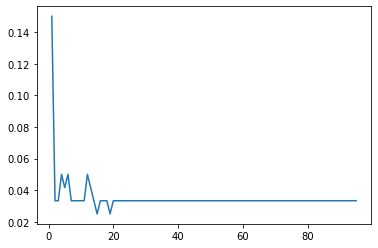

In [93]:
plt.plot(range(1,96),error_rates)


In [94]:
    model = AdaBoostClassifier(n_estimators=15)
    model.fit(X_train,y_train)
    model.feature_importances_

array([0.06666667, 0.        , 0.06666667, 0.13333333, 0.06666667,
       0.06666667, 0.        , 0.        , 0.13333333, 0.13333333,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.13333333, 0.2       ])

In [95]:
feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [96]:
feats

,Importance
appetite,0.066667
pus_cell,0.000000
pedal_edema,0.066667
packet_cell_volume,0.133333
diabetes_mellitus,0.066667
red_blood_cells,0.066667
coronary_artery_disease,0.000000
sugar,0.000000
albumin,0.133333
serum_creatinine,0.133333


In [97]:
imp_feats = feats[feats['Importance']>0]

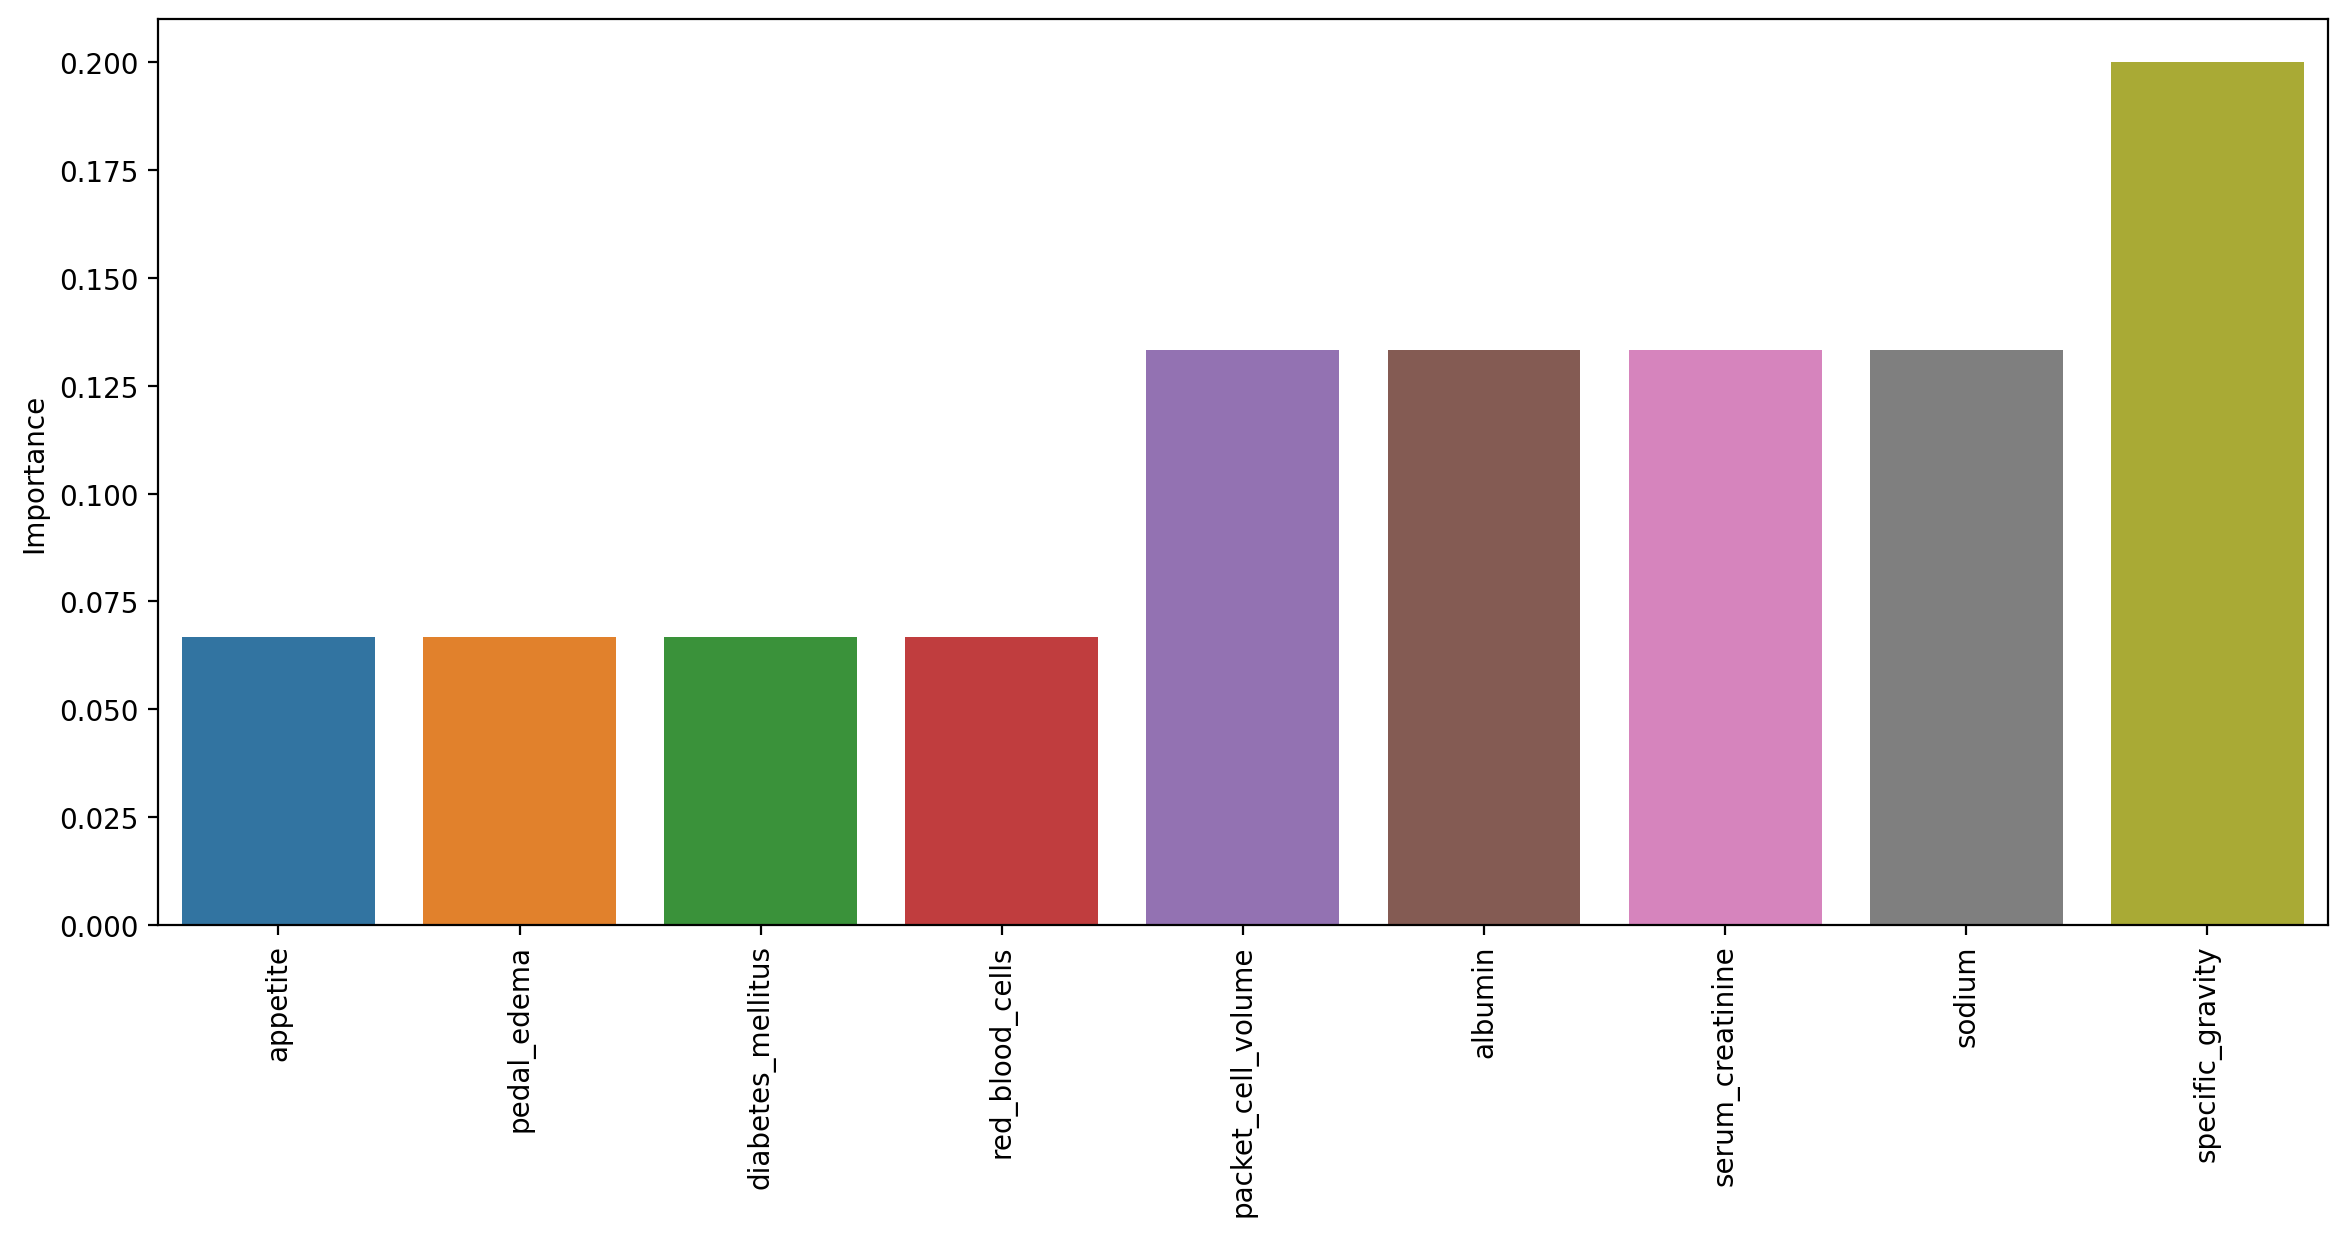

In [98]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')

plt.xticks(rotation=90);

In [99]:
XX=df[imp_feats.transpose().columns]


# KNN+CFS+ADABOOST

In [100]:
knn = KNeighborsClassifier()
operations = [('scaler',scaler),('knn',knn)]
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.3, random_state=42)


In [101]:
k_values = list(range(1,20))
pipe = Pipeline(operations)
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [102]:
param_grid = {'knn__n_neighbors': k_values}

In [103]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [104]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.96428571, 0.97857143, 0.98571429, 0.98214286, 0.98214286,
       0.98571429, 0.97857143, 0.97857143, 0.97857143, 0.97857143,
       0.97142857, 0.97142857, 0.97142857, 0.97142857, 0.96785714,
       0.97142857, 0.975     , 0.975     , 0.97142857])

In [105]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(scaled_X_train,y_train) 


KNeighborsClassifier(n_neighbors=3)

In [106]:
y_pred = knn_model.predict(scaled_X_test)

In [107]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        76
         1.0       0.98      0.91      0.94        44

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.95       120
weighted avg       0.96      0.96      0.96       120



In [108]:
accuracy_score(y_test,y_pred)

0.9583333333333334

In [109]:
MSE = mean_squared_error(y_test,y_pred)
RMSE = math.sqrt(MSE)
RMSE

0.2041241452319315

###### Amelioration avec adaboost



## SVM+CFS+ADABOOST


In [110]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [111]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [112]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [113]:
grid.best_params_

{'C': 0.1, 'gamma': 'scale'}

In [114]:
grid_pred = grid.predict(scaled_X_test)

In [115]:
confusion_matrix(y_test,grid_pred)

array([[75,  1],
       [ 4, 40]], dtype=int64)

In [116]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97        76
         1.0       0.98      0.91      0.94        44

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.95       120
weighted avg       0.96      0.96      0.96       120



In [117]:
accuracy_score(y_test,grid_pred)

0.9583333333333334

###### Amelioration avec adaboost


## LOGISTIC REGRESSION + ADABOOST + CFS

In [118]:
log_model = LogisticRegression()

In [119]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [120]:
y_pred = log_model.predict(scaled_X_test)

In [121]:
confusion_matrix(y_test,y_pred)

array([[75,  1],
       [ 2, 42]], dtype=int64)

In [122]:
accuracy_score(y_test,y_pred)

0.975

#### the model is more accurate with adaboost

## Naive Bayes+ADABOOST+CFS

In [123]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print( format(accuracy_score(y_test, y_pred)))





0.925


# BONUS

## Gradient Boosting

In [124]:
from sklearn.ensemble import GradientBoostingClassifier

In [125]:
param_grid = {"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6]}

In [126]:
gb_model = GradientBoostingClassifier()

In [127]:
grid = GridSearchCV(gb_model,param_grid)

In [128]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [129]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [130]:
predictions = grid.predict(X_test)

In [131]:
predictions

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1.])

In [132]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97        76
         1.0       0.95      0.93      0.94        44

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.95       120
weighted avg       0.96      0.96      0.96       120



In [133]:
grid.best_estimator_.feature_importances_

array([1.72148186e-02, 4.01253237e-05, 3.11235837e-02, 7.69299107e-06,
       2.84969805e-02, 2.20957996e-01, 1.32365717e-01, 1.12449005e-02,
       5.58548185e-01])

In [134]:
feat_import = grid.best_estimator_.feature_importances_

In [135]:
imp_feats = pd.DataFrame(index=XX.columns,data=feat_import,columns=['Importance'])

In [136]:
imp_feats.transpose()
imp=imp_feats[imp_feats['Importance']>0.01]
imp

,Importance
appetite,0.017215
packet_cell_volume,0.031124
red_blood_cells,0.028497
albumin,0.220958
serum_creatinine,0.132366
sodium,0.011245
specific_gravity,0.558548


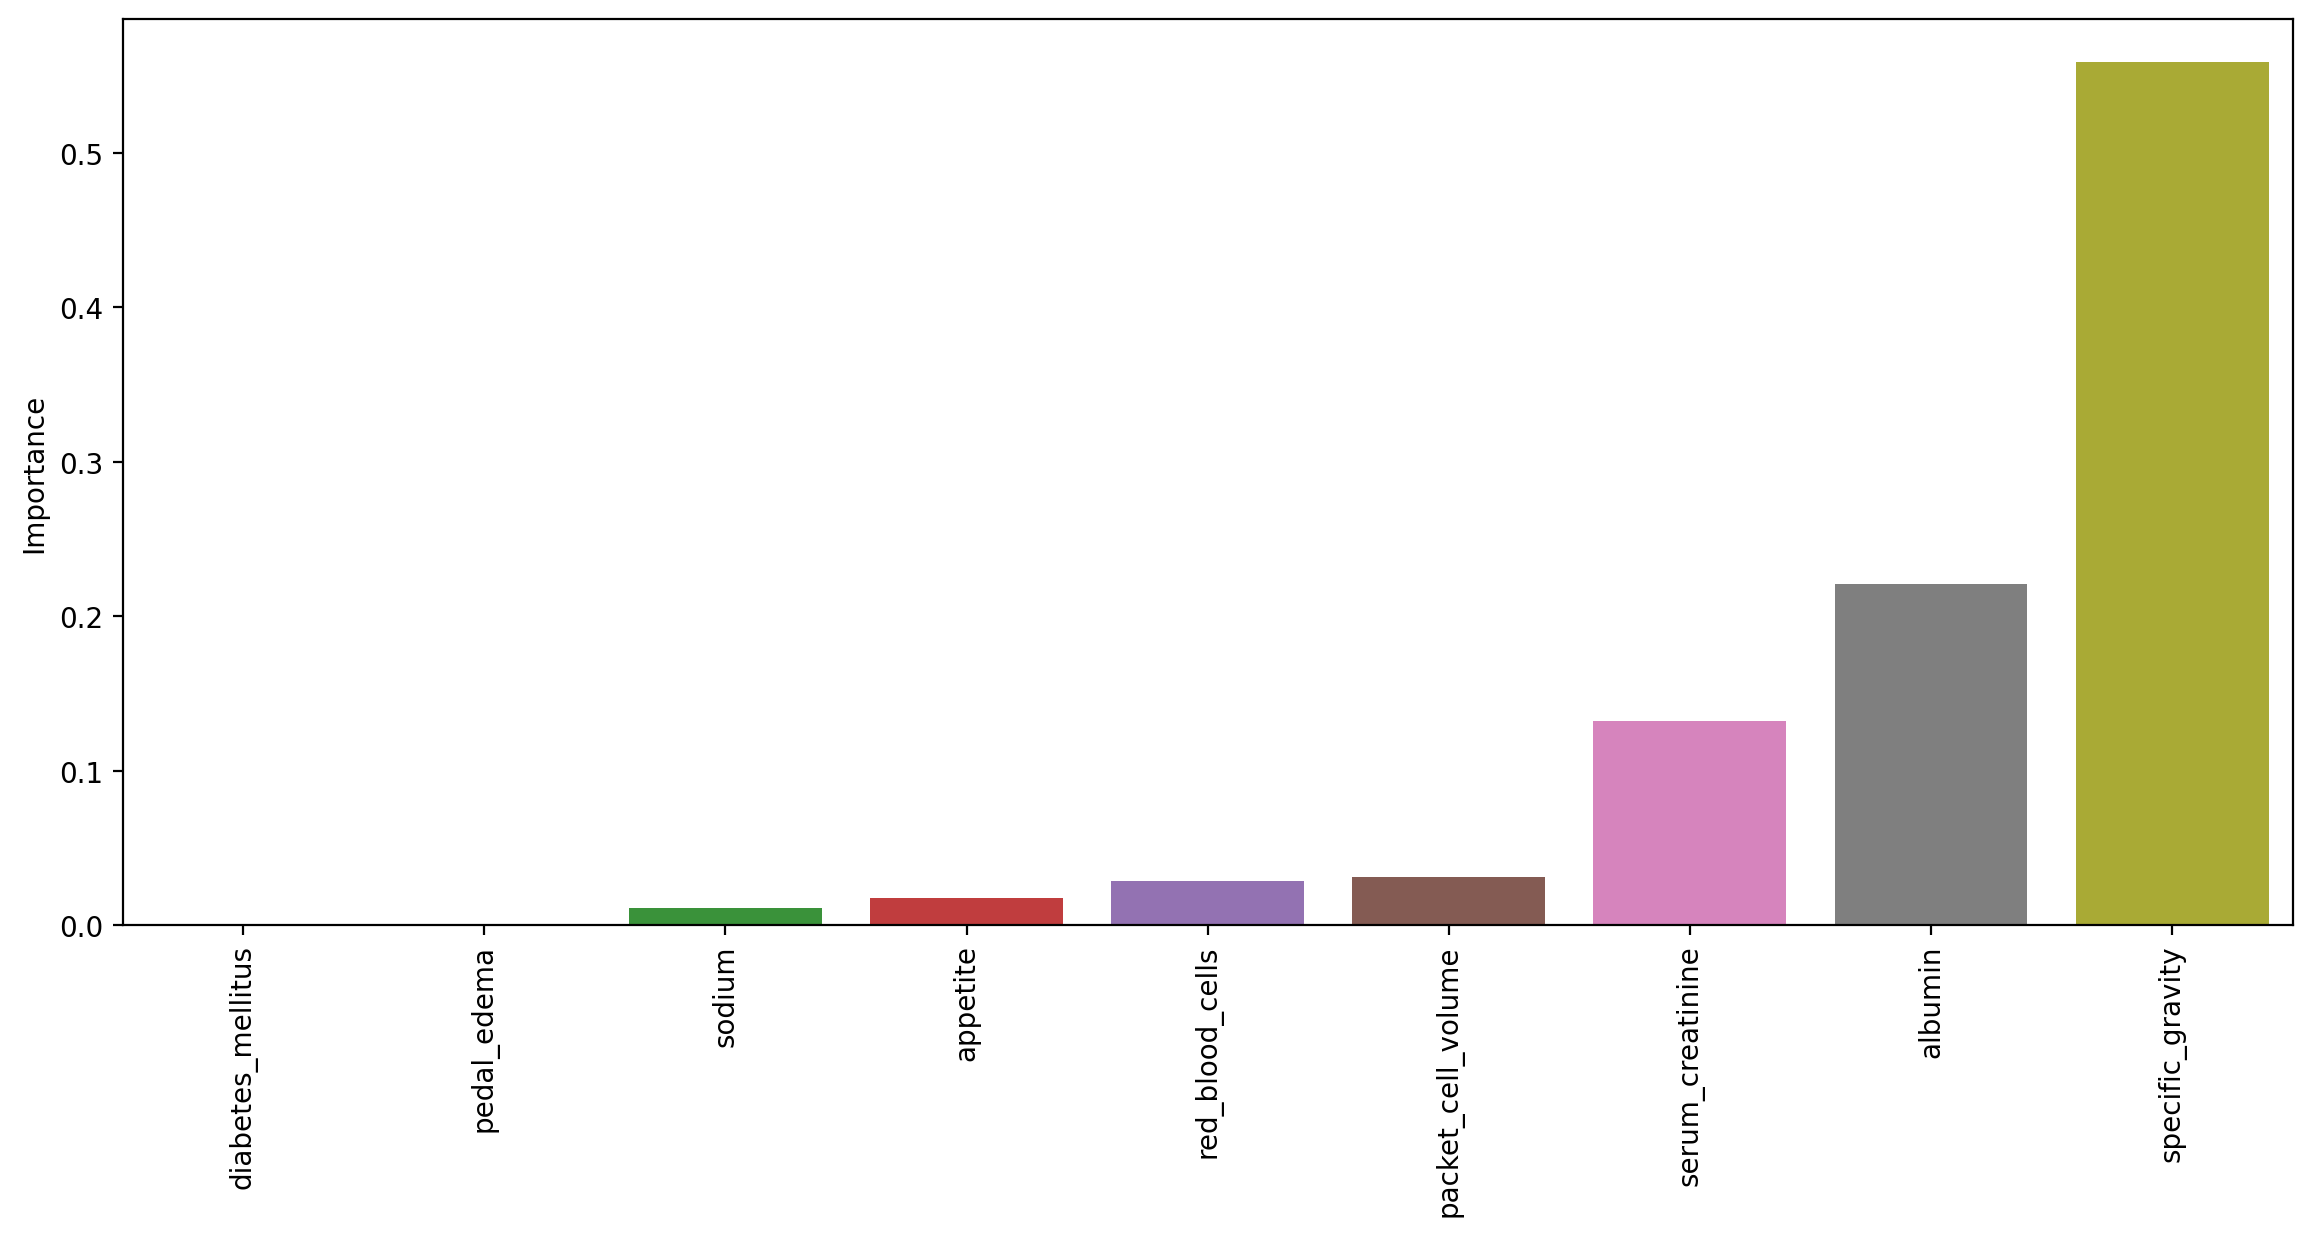

In [137]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);

In [138]:
XXX=XX[imp.transpose().columns]
XXX


,appetite,packet_cell_volume,red_blood_cells,albumin,serum_creatinine,sodium,specific_gravity
0,0.0,44.0,2.0,1.0,1.2,137.6,1.020
1,0.0,38.0,2.0,4.0,0.8,136.8,1.020
2,1.0,31.0,1.0,2.0,1.8,133.8,1.010
3,1.0,32.0,1.0,4.0,3.8,111.0,1.005
4,0.0,35.0,1.0,2.0,1.4,138.4,1.010
...,...,...,...,...,...,...,...
395,0.0,47.0,1.0,0.0,0.5,150.0,1.020
396,0.0,54.0,1.0,0.0,1.2,141.0,1.025
397,0.0,49.0,1.0,0.0,0.6,137.0,1.020
398,0.0,51.0,1.0,0.0,1.0,135.0,1.025


# KNN + GB+CFS+ADABOOST

In [139]:
X_train, X_test, y_train, y_test = train_test_split(XXX, y, test_size=0.3, random_state=42)

In [140]:
knn = KNeighborsClassifier()
operations = [('scaler',scaler),('knn',knn)]

In [141]:
k_values = list(range(1,20))
pipe = Pipeline(operations)
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [142]:
param_grid = {'knn__n_neighbors': k_values}

In [143]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [144]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=2))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=2),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 2,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [145]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.95714286, 0.97857143, 0.97857143, 0.97857143, 0.97857143,
       0.97857143, 0.97142857, 0.97142857, 0.96785714, 0.96785714,
       0.975     , 0.97857143, 0.97857143, 0.97857143, 0.97857143,
       0.97857143, 0.96785714, 0.97142857, 0.96785714])

In [146]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(scaled_X_train,y_train) 


KNeighborsClassifier(n_neighbors=2)

In [147]:
y_pred = knn_model.predict(scaled_X_test)
kn=y_pred

In [148]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        76
         1.0       1.00      0.93      0.96        44

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [149]:
accuracy_score(y_test,y_pred)

0.975

In [150]:
MSE = mean_squared_error(y_test,y_pred)
RMSE = math.sqrt(MSE)
RMSE

0.15811388300841897

### amelioration avec GB

# SVM+ GB+CFS+ADABOOST

In [151]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [152]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [153]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [154]:
grid.best_params_

{'C': 0.1, 'gamma': 'scale'}

In [155]:
grid_pred = grid.predict(scaled_X_test)
sv=grid_pred

In [156]:
confusion_matrix(y_test,grid_pred)

array([[76,  0],
       [ 3, 41]], dtype=int64)

In [157]:
print(classification_report(y_test,grid_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        76
         1.0       1.00      0.93      0.96        44

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [158]:
accuracy_score(y_test,grid_pred)

0.975

#### amelioration avec GB

# LR+ GB+CFS+ADABOOST

In [159]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [160]:
y_pred = log_model.predict(scaled_X_test)
lr=y_pred

In [161]:
accuracy_score(y_test,y_pred)

0.9583333333333334

#### Less accurate , and its logic because it don't have enough features to predict on 


# Naive Bayes+ GB+CFS+ADABOOST

In [162]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
nb=y_pred
print( format(accuracy_score(y_test, y_pred)))





0.95


### Tres bonne amelioration 

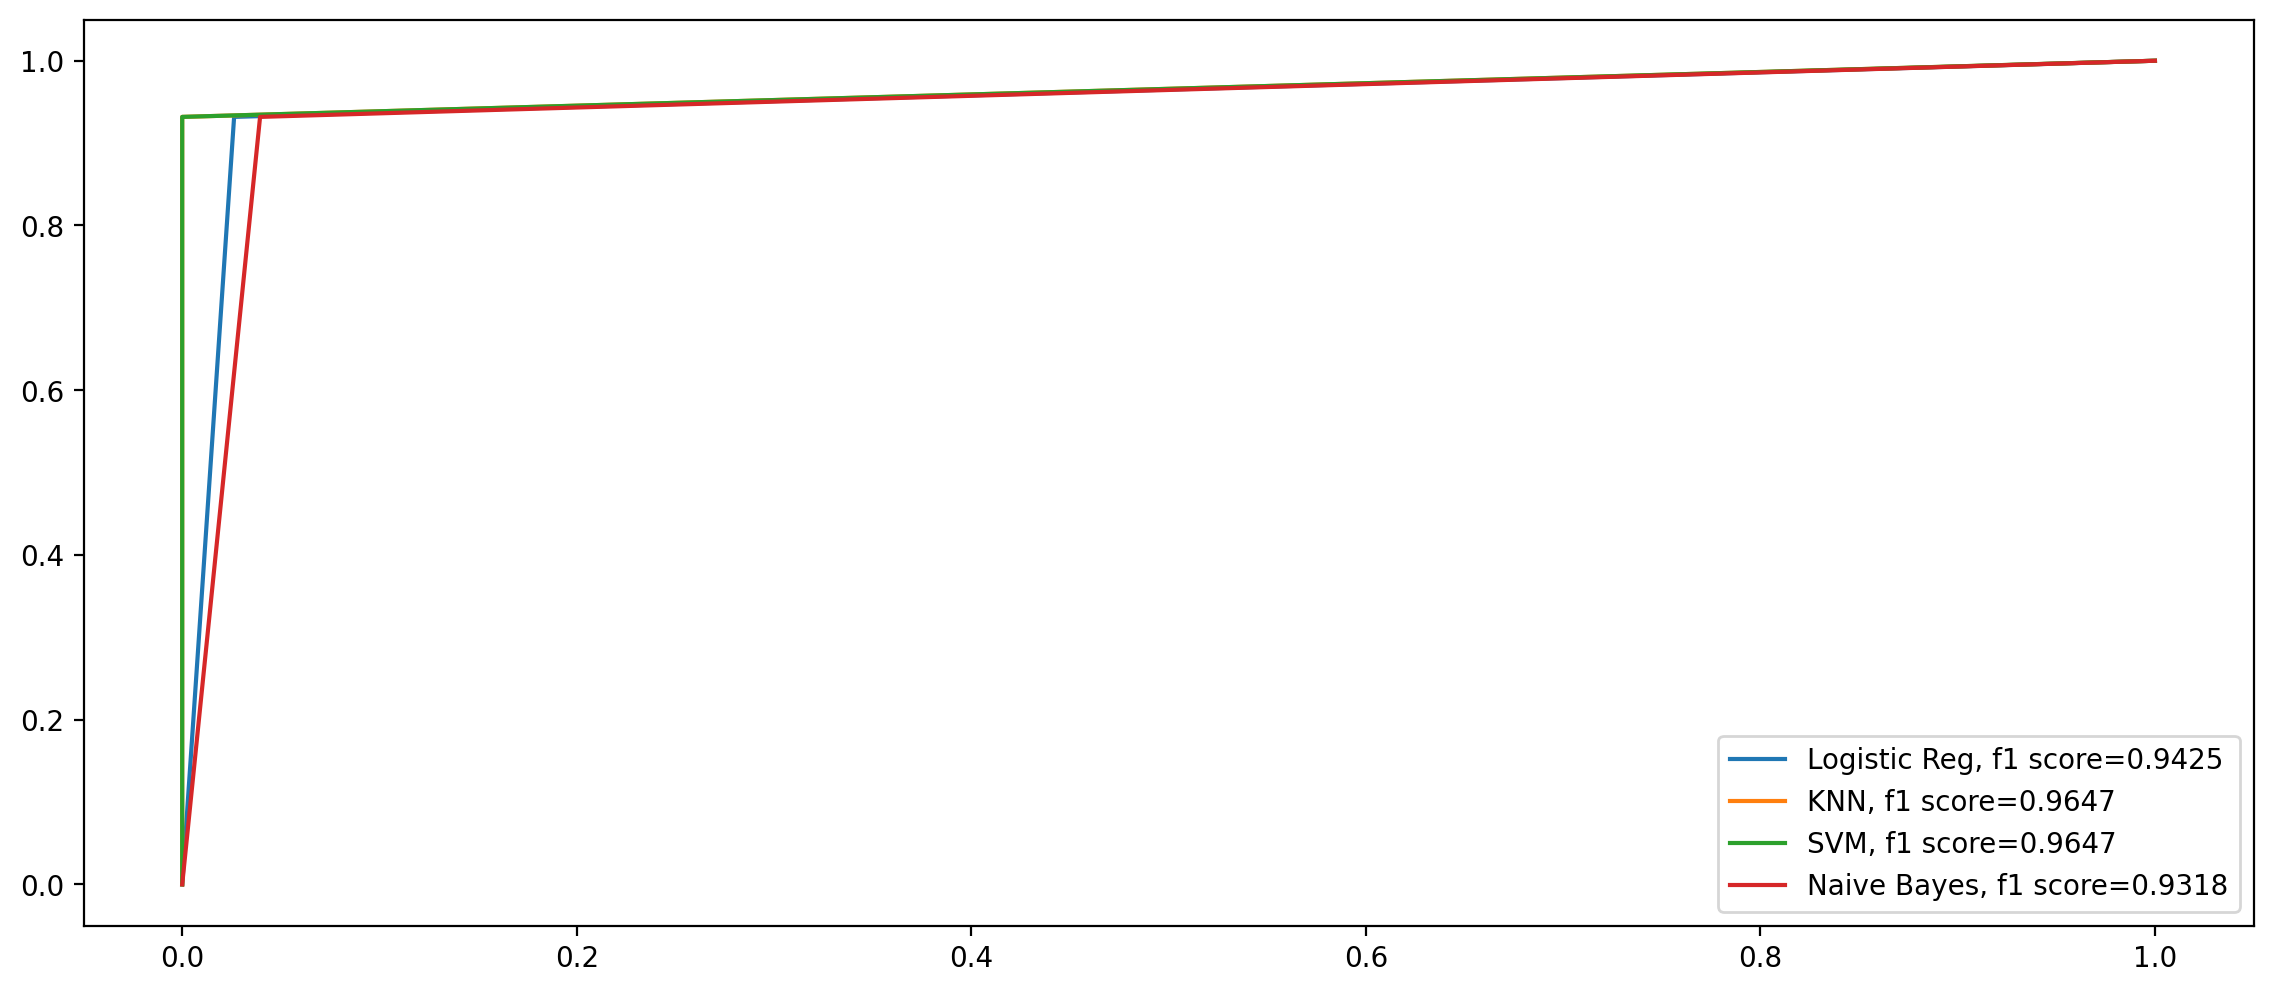

In [170]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
plt.figure(figsize=(14,6),dpi=200)


#fit tree model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, lr)
auc = round(metrics.f1_score(y_test, lr), 4)
plt.plot(fpr,tpr,label="Logistic Reg, f1 score="+str(auc))

#fit KNN model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, kn)
auc = round(metrics.f1_score(y_test, kn), 4)
plt.plot(fpr,tpr,label="KNN, f1 score="+str(auc))

#fit SVM model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, sv)
auc = round(metrics.f1_score(y_test, sv), 4)
plt.plot(fpr,tpr,label="SVM, f1 score="+str(auc))

#fit SVM model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, nb)
auc = round(metrics.f1_score(y_test, nb), 4)
plt.plot(fpr,tpr,label="Naive Bayes, f1 score="+str(auc))
#add legend
plt.legend()
